In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [22]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv("FINAL_USO.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


In [6]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'SP_open', 'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume',
       'DJ_open', 'DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume',
       'EG_open', 'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume',
       'EU_Price', 'EU_open', 'EU_high', 'EU_low', 'EU_Trend', 'OF_Price',
       'OF_Open', 'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend', 'OS_Price',
       'OS_Open', 'OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open',
       'SF_High', 'SF_Low', 'SF_Volume', 'SF_Trend', 'USB_Price', 'USB_Open',
       'USB_High', 'USB_Low', 'USB_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High',
       'PLT_Low', 'PLT_Trend', 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low',
       'PLD_Trend', 'RHO_PRICE', 'USDI_Price', 'USDI_Open', 'USDI_High',
       'USDI_Low', 'USDI_Volume', 'USDI_Trend', 'GDX_Open', 'GDX_High',
       'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume', 'USO_Open',
       'USO_Hig

In [7]:
df.isnull().sum()

Date             0
Open             0
High             0
Low              0
Close            0
                ..
USO_High         0
USO_Low          0
USO_Close        0
USO_Adj Close    0
USO_Volume       0
Length: 81, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1718 non-null   object 
 1   Open           1718 non-null   float64
 2   High           1718 non-null   float64
 3   Low            1718 non-null   float64
 4   Close          1718 non-null   float64
 5   Adj Close      1718 non-null   float64
 6   Volume         1718 non-null   int64  
 7   SP_open        1718 non-null   float64
 8   SP_high        1718 non-null   float64
 9   SP_low         1718 non-null   float64
 10  SP_close       1718 non-null   float64
 11  SP_Ajclose     1718 non-null   float64
 12  SP_volume      1718 non-null   int64  
 13  DJ_open        1718 non-null   float64
 14  DJ_high        1718 non-null   float64
 15  DJ_low         1718 non-null   float64
 16  DJ_close       1718 non-null   float64
 17  DJ_Ajclose     1718 non-null   float64
 18  DJ_volum

In [9]:
import datetime
df['date_parsed'] = pd.to_datetime(df['Date'],format="%Y-%m-%d")
df['day'] = (df['date_parsed'].dt.day).astype(int)
df['month'] = (df['date_parsed'].dt.month).astype(int)
df['year'] = (df['date_parsed'].dt.year).astype(int)

In [11]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume,date_parsed,day,month,year
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,36.900002,36.939999,36.049999,36.130001,36.130001,12616700,2011-12-15,15,12,2011
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,36.180000,36.500000,35.730000,36.270000,36.270000,12578800,2011-12-16,16,12,2011
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,...,36.389999,36.450001,35.930000,36.200001,36.200001,7418200,2011-12-19,19,12,2011
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,...,37.299999,37.610001,37.220001,37.560001,37.560001,10041600,2011-12-20,20,12,2011
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,...,37.669998,38.240002,37.520000,38.110001,38.110001,10728000,2011-12-21,21,12,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713,2018-12-24,119.570000,120.139999,119.570000,120.019997,120.019997,9736400,239.039993,240.839996,234.270004,...,9.490000,9.520000,9.280000,9.290000,9.290000,21598200,2018-12-24,24,12,2018
1714,2018-12-26,120.620003,121.000000,119.570000,119.660004,119.660004,14293500,235.970001,246.179993,233.759995,...,9.250000,9.920000,9.230000,9.900000,9.900000,40978800,2018-12-26,26,12,2018
1715,2018-12-27,120.570000,120.900002,120.139999,120.570000,120.570000,11874400,242.570007,248.289993,238.960007,...,9.590000,9.650000,9.370000,9.620000,9.620000,36578700,2018-12-27,27,12,2018
1716,2018-12-28,120.800003,121.080002,120.720001,121.059998,121.059998,6864700,249.580002,251.399994,246.449997,...,9.540000,9.650000,9.380000,9.530000,9.530000,22803400,2018-12-28,28,12,2018


In [12]:
df.drop(['Date','date_parsed'],inplace=True,axis=1)

In [13]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume,day,month,year
0,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,122.180000,...,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700,15,12,2011
1,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,121.589996,...,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800,16,12,2011
2,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,120.290001,...,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200,19,12,2011
3,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,123.930000,...,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600,20,12,2011
4,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,124.169998,...,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000,21,12,2011


In [15]:
X=df

In [16]:
y=X.pop('Adj Close')

In [17]:
from sklearn.tree import DecisionTreeRegressor

In [18]:
X_train,y_train = X[0:int(0.7*len(X))],y[0:int(0.7*len(y))]
X_train[:-1]

,Open,High,Low,Close,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,...,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume,day,month,year
0,154.740005,154.949997,151.710007,152.330002,21521900,123.029999,123.199997,121.989998,122.180000,105.441238,...,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700,15,12,2011
1,154.309998,155.369995,153.899994,155.229996,18124300,122.230003,122.949997,121.300003,121.589996,105.597549,...,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800,16,12,2011
2,155.479996,155.860001,154.360001,154.869995,12547200,122.059998,122.320000,120.029999,120.290001,104.468536,...,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200,19,12,2011
3,156.820007,157.429993,156.580002,156.979996,9136300,122.180000,124.139999,120.370003,123.930000,107.629784,...,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600,20,12,2011
4,156.979996,157.529999,156.130005,157.160004,11996100,123.930000,124.360001,122.750000,124.169998,107.838242,...,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000,21,12,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1196,113.870003,113.879997,112.650002,113.250000,20864900,219.979996,220.759995,219.750000,220.699997,211.210785,...,122610500,10.600000,10.770000,10.560000,10.670000,10.670000,25907100,23,11,2016
1197,113.419998,113.510002,112.349998,112.610001,5345900,221.100006,221.559998,221.009995,221.520004,211.995529,...,34433900,10.500000,10.550000,10.280000,10.330000,10.330000,29733900,25,11,2016
1198,113.230003,113.839996,112.769997,113.800003,5655400,221.160004,221.479996,220.360001,220.479996,211.000229,...,100582700,10.470000,10.600000,10.350000,10.440000,10.440000,58180100,28,11,2016
1199,112.760002,113.480003,112.690002,113.269997,7438600,220.520004,221.440002,220.169998,220.910004,211.411743,...,50015500,10.100000,10.150000,9.970000,10.060000,10.060000,66923800,29,11,2016


In [19]:
X_test,y_test = X[int(0.7*len(X)):len(X)],y[int(0.7*len(X)):len(X)]

In [24]:
from xgboost import XGBRegressor
xgbr = XGBRegressor()
xgbr.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [25]:
xgbr.score(X_train,y_train)

0.9999984581887557

In [27]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(xgbr,X_train,y_train,cv=10)
print("mean cv score ",cv.mean())

mean cv score  0.9697199572617221


In [29]:
from sklearn.metrics import mean_squared_error
y_pred = xgbr.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
print('The mean squared error is  ',mse)

The mean squared error is   0.08902294171364705


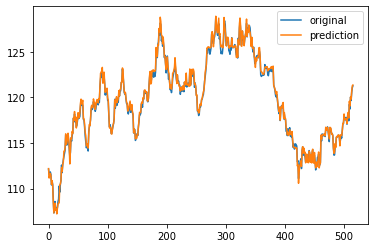

In [30]:
import matplotlib.pyplot as plt
x_test_label = range(len(y_test))
x_pred_label = range(len(y_pred))
plt.plot(x_test_label,y_test,label="original")
plt.plot(x_pred_label,y_pred,label="prediction")
plt.legend()
plt.show()